# Homework: Goals & Approaches

> The body grows stronger under stress. The mind does not.
> 
>  -- Magic the Gathering, _Fractured Sanity_

This homework deals with the goals you must define, along with the approaches you deem necessary to achieve those goals. 
Key to this will be a focus on your _workflows_: 

- are they reproducible? 
- are they maintainable? 
- are they well-justified and communicated? 

This is not a "machine-learning" course, but machine learning plays a large part in modern text analysis and NLP. 
Machine learning, in-turn, has a number of issues tracking and solving issues in a collaborative, asynchronous, distributed manner. 

It's not inherently _wrong_ to use pre-configured models and libraries! 
In fact, you will likely be unable to create a set of ML algorithms that "beat" something others have spent 100's of hours creating, optimizing, and validating. 
However, to answer the three questions above, we need a way to explicitly track our decisions to use others' work, and efficiently _swap out_ that work for new ideas and directions as the need arises. 

This homework is a "part 1" of sorts, where you will construct several inter-related pipelines in a way that will allow _much easier_ adjustment, experimentation, and measurement in "part 2"




## Setup

### Dependencies 
As before, ensure you have an up-to-date environment to isolate your work. 
Use the `environment.yml` file in the project root to create/update the `text-data-class` environment. 
> I expect any additional dependencies to be added here, which will show up on your pull-request. 

### Data
Once again, we have set things up to use DVC to import our data. 
If the data changes, things will automatically update! 
The data for this homework has been imported as `mtg.feather` under the `data/` directory at the top-level of this repository. 
In order to ensure your local copy of the repo has the actual data (instead of just the `mtg.feather.dvc` stub-file), you need to run `dvc pull`

In [ ]:
!dvc pull

Then you may load the data into your notebooks and scripts e.g. using pandas+pyarrow:

In [3]:
import pandas as pd
(pd.read_feather('../../data/mtg.feather')# <-- will need to change for your notebook location
 .head()[['name','text', 'mana_cost', 'flavor_text','release_date', 'edhrec_rank']]  
)

FileNotFoundError: [Errno 2] No such file or directory: '../../data/mtg.feather'

But that's not all --- at the end of this homework, we will be able to run a `dvc repro` command and all of our main models and results will be made available for your _notebook_ to open and display. 

### Submission Structure
You will need to submit a pull-request on DagsHub with the following additions: 

- your subfolder, e.g. named with your user id, inside the `homework/hw2-goals-approaches/` folder
    - your "lab notebook", as an **`.ipynb` or `.md`** (e.g. jupytext), that will be exported to PDF for Canvas submission. **This communicates your _goals_**, along with the results that will be compared to them. 
    - your **`dvc.yaml`** file that will define  the inputs and outputs of your _approaches_. See [the DVC documentation](https://dvc.org/doc/user-guide/project-structure/pipelines-files) for information!
    - **source code** and **scripts** that define the preprocessing and prediction `Pipeline`'s you wish to create. You may then _print_ the content of those scripts at the end of your notebook e.g. as appendices using 
- any updates to `environment.yml` to add the dependencies you want to use for this homework


## Part 1: Unsupervised Exploration

Investigate the [BERTopic](https://maartengr.github.io/BERTopic/index.html) documentation (linked), and train a model using their library to create a topic model of the `flavor_text` data in the dataset above. 

- In a `topic_model.py`, load the data and train a bertopic model. You will `save` the model in that script as a new trained model object
- add a "topic-model" stage to your `dvc.yaml` that has `mtg.feather` and `topic_model.py` as dependencies, and your trained model as an output
- load the trained bertopic model into your notebook and display
    1. the `topic_visualization` interactive plot [see docs](https://maartengr.github.io/BERTopic/api/plotting/topics.html)
    2. Use the plot to come up with working "names" for each major topic, adjusting the _number_ of topics as necessary to make things more useful. 
    3. Once you have names, create a _Dynamic Topic Model_ by following [their documentation](https://maartengr.github.io/BERTopic/getting_started/topicsovertime/topicsovertime.html). Use the `release_date` column as timestamps. 
    4. Describe what you see, and any possible issues with the topic models BERTopic has created. **This is the hardest part... interpreting!**

In [1]:
from bertopic import BERTopic

# load model and display 
topic_model = BERTopic.load("my_model")

# load topic model variables
from topic_model import mtg as text
from topic_model import topics as topics
from topic_model import probs as probs

Batches: 100%|██████████| 927/927 [09:23<00:00,  1.64it/s]
2022-04-27 12:22:17,326 - BERTopic - Transformed documents to Embeddings
2022-04-27 12:22:39,030 - BERTopic - Reduced dimensionality with UMAP


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

2022-04-27 12:22:44,351 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2022-04-27 12:23:43,919 - BERTopic - Reduced number of topics from 958 to 362
2022-04-27 12:23:47,740 - BERTopic - Reduced number of topics from 362 to 21
Batches: 100%|██████████| 927/927 [09:07<00:00,  1.69it/s]
2022-04-27 12:32:57,600 - BERTopic - Transformed documents to Embeddings
2022-04-27 12:33:09,326 - BERTopic - Reduced dimensionality with UMAP


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

2022-04-27 12:33:13,475 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2022-04-27 12:33:58,475 - BERTopic - Reduced number of topics from 935 to 21
/Users/yousufabdelfatah/opt/anaconda3/lib/python3.8/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [4]:
# load data
mtg = pd.read_feather('../../../data/mtg.feather')

In [5]:
topic_model.visualize_barchart()

In [6]:
topic_model.visualize_heatmap()

In [7]:
topic_model.visualize_topics([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])

In [8]:
# hierarchical clustering


# what are some working names for each of the topics

In [9]:
release_date = mtg[['release_date', 'flavor_text']].dropna().drop(columns=['flavor_text'])

# convert release date to list
release_date = list(release_date['release_date'])

In [10]:
# create a dynamic topic model using release date columns as timestamps
topics_over_time = topic_model.topics_over_time(text, topics, release_date)

281it [00:53,  5.29it/s]


In [11]:
#Describe! All the topics increase over time that's not helpful
# normalize frequency

In [12]:
# topics_over_time.groupby('Timestamp')['Frequency'].transform()

## Part 2 Supervised Classification

Using only the `text` and `flavor_text` data, predict the color identity of cards: 

Follow the sklearn documentation covered in class on text data and Pipelines to create a classifier that predicts which of the colors a card is identified as. 
You will need to preprocess the target _`color_identity`_ labels depending on the task: 

- Source code for pipelines
    - in `multiclass.py`, again load data and train a Pipeline that preprocesses the data and trains a multiclass classifier (`LinearSVC`), and saves the model pickel output once trained. target labels with more than one color should be _unlabeled_! 
    - in `multilabel.py`, do the same, but with a multilabel model (e.g. [here](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_multilabel.html#sphx-glr-auto-examples-miscellaneous-plot-multilabel-py)). You should now use the original `color_identity` data as-is, with special attention to the multi-color cards. 
- in `dvc.yaml`, add these as stages to take the data and scripts as input, with the trained/saved models as output. 

- in your notebook: 
    - Describe:  preprocessing steps (the tokenization done, the ngram_range, etc.), and why. 
    - load both models and plot the _confusion matrix_ for each model ([see here for the multilabel-specific version](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.multilabel_confusion_matrix.html))
    - Describe: what are the models succeeding at? Where are they struggling? How do you propose addressing these weaknesses next time?




Describe the pre-processing steps:


In [13]:
# plot confusion matrixes
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay

In [14]:
from multiclass import X_test as X_mc, y_test as y_mc
from multilabel import X_test as X_ml, y_test as y_ml

In [15]:
import pickle
file = open("mtg_classifier_multilabel.pkl",'rb')
mc_classifier = pickle.load(file)
file.close()

file = open("mtg_classifier.pkl",'rb')
ml_classifier = pickle.load(file)
file.close()

In [16]:
# get predictions
y_mc_pred = mc_classifier.predict(X_mc)
y_ml_pred = ml_classifier.predict(X_ml)

In [17]:
# confusion matrixes
print("Multiclass confusion matrix:")
print(confusion_matrix(y_mc, y_mc_pred))

print("Multilabel confusion matrix:")
print(multilabel_confusion_matrix(y_ml, y_ml_pred))


Multiclass confusion matrix:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   3   0   6   0   0   1 870   2   0   0   0   0   0]
 [  4   2   0 916   1   0   5   6   9   0   0   0   0   0]
 [  1 856   1   2   0   0   4   1   6   0   0   0   0   0]
 [  1   5   0   4   0   0 869   2   8   0   0   0   0   0]
 [  7   1   0   3   0   1   2   6 877   0   0   0   0   0]]
Multilabel confusion matrix:
[[[5.341e+03 0.000e+00]
  [5.860e+02 0.000e+00]]

 [[5.050e+03 0.000e+00]
  [8.770e+02 0.000e+00]]

 [[5.861e+03 0.

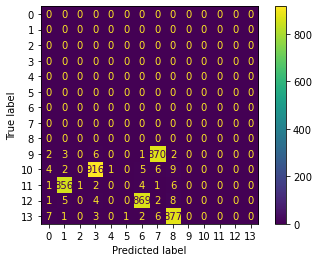

In [18]:
# plot multiclass confusion matrix
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_mc, y_mc_pred)).plot()

TypeError: Invalid shape (33, 2, 2) for image data

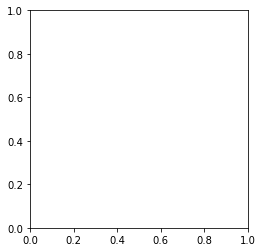

In [19]:
# multilabel confusion matrix plot
ConfusionMatrixDisplay(confusion_matrix=multilabel_confusion_matrix(y_ml, y_ml_pred)).plot()

In [20]:
# How are they doing? Let's look at scores!

# multilabel
from multilabel import f1, precision, recall
print(f1)
print(precision)
print(recall)

[0.90051458 0.89301802 0.8503937  0.96774194 0.91666667 0.
 0.95652174 0.95238095 0.82882883 0.88       0.88       0.76033058
 0.61538462 0.80314961 0.88900979 0.87581699 0.90909091 0.96551724
 0.84210526 0.89473684 0.79329609 0.90588883 0.85964912 0.83333333
 0.8503937  0.89001692 0.85074627 0.86342229]
[0.90517241 0.88209121 0.8852459  1.         1.         0.
 1.         1.         0.95833333 1.         1.         0.9787234
 1.         1.         0.8851571  0.93055556 1.         1.
 0.90566038 1.         0.93421053 0.90142388 0.98       1.
 0.96428571 0.85021552 0.93442623 0.83333333]
[0.89590444 0.90421893 0.81818182 0.9375     0.84615385 0.
 0.91666667 0.90909091 0.73015873 0.78571429 0.78571429 0.62162162
 0.44444444 0.67105263 0.89289617 0.82716049 0.83333333 0.93333333
 0.78688525 0.80952381 0.68932039 0.91039823 0.765625   0.71428571
 0.76056338 0.93372781 0.78082192 0.89576547]


Really good at precision, eh at recall, not bad overall

In [21]:
# multiclass
from multiclass import f1, precision, recall
print(f1)
print(precision)
print(recall)

[0.93175409 0.93203883 0.92440854 0.92912514 0.91231964]
[0.92913386 0.94840834 0.92923434 0.91494002 0.90828729]
[0.93438914 0.91622481 0.91963261 0.94375703 0.91638796]


pretty good all around- balanced between precision and recall

## Part 3: Regression?

> Can we predict the EDHREC "rank" of the card using the data we have available? 

- Like above, add a script and dvc stage to create and train your model
- in the notebook, aside from your descriptions, plot the `predicted` vs. `actual` rank, with a 45-deg line showing what "perfect prediction" should look like. 
- This is a freeform part, so think about the big picture and keep track of your decisions: 
    - what model did you choose? Why? 
    - What data did you use from the original dataset? How did you proprocess it? 
    - Can we see the importance of those features? e.g. logistic weights? 
    
How did you do? What would you like to try if you had more time? 


In [22]:
# plot predicted vs actual
import matplotlib.pyplot as plt
file = open("regression.pkl",'rb')
clf = pickle.load(file)
file.close()


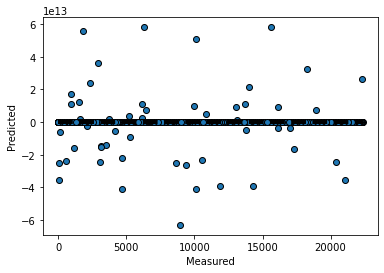

In [23]:
from regression import y_test, X_test 

#predict the test set
y_pred = clf.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

This is garbage- maybe try lasso

#### what regression model did I choose?
linear regression in part because it's easily interpretable

#### what data do we use and how did I process it? 

first selection based just off what sounds important: 
mtg = pd.read_feather('../../../data/mtg.feather')[['edhrec_rank', 'color_identity', 'converted_mana_cost', 'power', 'toughness', 'rarity', 'subtypes', \
'supertypes', 'types', 'text', 'flavor_text', 'life', 'block']]

Lots of NAs in power, toughness, and life so I got rid of those
I thought we could make categoires for supertypes and subtypes but there were so many that it didn't really amke sense to do so so I then got rid of those
Turned rarity into a bynch of dummies as well as blocks and types (33 possible) 
32 possible color combos so made them dummies too
- this is relying on a lot of dummies

Combined flavor text and text into one column, vectorized, made a tfidf dtm and appended that to the dataframe 

train test split of 80/20

In [24]:
# feature importance!
# get importance in descending order
import numpy as np
importance = np.sort(clf.coef_)

In [25]:
X_test.columns

Index(['converted_mana_cost', 'rarity_common', 'rarity_uncommon',
       'block_Amonkhet', 'block_Arena League', 'block_Battle for Zendikar',
       'block_Commander', 'block_Conspiracy', 'block_Core Set',
       'block_Friday Night Magic',
       ...
       '{x} {b}', '{x} {g}', '{x} {r}', '{x} {t}', '{x} {u}', '{x} {w}',
       '{x} {x}', 'äagesdotter', 'äagesdotter archmage', 'æther'],
      dtype='object', length=14548)

In [26]:
feature_importance = pd.concat([pd.DataFrame(X_test.columns), pd.DataFrame(importance)], axis=1)
print(feature_importance)

                          0             0
0       converted_mana_cost -6.257591e+15
1             rarity_common -1.610108e+15
2           rarity_uncommon -1.306452e+15
3            block_Amonkhet -1.249636e+15
4        block_Arena League -1.244173e+15
...                     ...           ...
14543               {x} {w}  2.095421e+15
14544               {x} {x}  3.772375e+15
14545           äagesdotter  4.813504e+15
14546  äagesdotter archmage  4.887563e+15
14547                 æther  2.094798e+16

[14548 rows x 2 columns]


Feature: 0, Score: -1610108481444373.75000
Feature: 1, Score: -1306451947923153.25000
Feature: 2, Score: -1249635909413360.50000
Feature: 3, Score: -1244173332731319.25000
Feature: 4, Score: -1228675353188780.50000
Feature: 5, Score: -888661657768704.12500
Feature: 6, Score: -887054258120794.12500
Feature: 7, Score: -536710282614186.43750
Feature: 8, Score: -285717236535703.93750


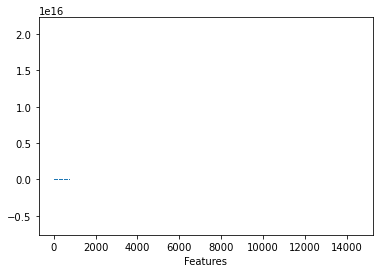

In [27]:
# summarize feature importance
for i,v in enumerate(importance[1:10]):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel('Features')
plt.show()